In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
%matplotlib inline

In [38]:
def ajuste_lineal(x, a, b):
    return a+ b+x

In [2]:
def ajuste_cubico(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

In [3]:
def ajuste_cuadratico(x, a, b, c):
    return a + b*x + c*x**2

In [45]:
rho_lineal = np.array([20.,10., 0.])
y_lineal = np.array([0.20, 27.5, 35.0])
popt, pcov = opt.curve_fit(ajuste_lineal, rho_lineal, y_lineal, np.array([0.0, 0.0]))

In [46]:
ajuste_lineal(np.array([0.20, 0.26, 0.30, 0.35]), *popt)

array([ 11.1 ,  11.16,  11.2 ,  11.25])

In [12]:
x0 = np.array([1000.0, -1.0, 0.0, 0.0])

In [31]:
ρ = np.array([1010., 1010., 1010., 1000., 1000., 1000., 1000.])

In [ ]:
ρ = np.array([20., 20., 20., 20., ])

In [32]:
y = np.array([0.0, 0.09, 0.18, 0.20, 0.26, 0.30, 0.35])

In [7]:
def rho(h):
    return -58.82352941176471 * (h - 0.18) + 1010

In [9]:
for i in range(3, 7):
    ρ[i] = rho(y[i])

In [10]:
ρ

array([ 1010.        ,  1010.        ,  1010.        ,  1008.82352941,
        1005.29411765,  1002.94117647,  1000.        ])

In [33]:
popt, pcov = opt.curve_fit(ajuste_cubico, ρ, y, x0)

In [14]:
popt, pcov = opt.curve_fit(ajuste_cuadratico, ρ, y)

In [15]:
popt

array([ -2.12955353e+03,   4.26247296e+00,  -2.13257796e-03])

In [34]:
rhos = ajuste_cubico(np.linspace(0, 0.35, 50), *popt)

In [16]:
rhos = ajuste_cuadratico(np.linspace(0, 0.35, 50), *popt)

In [35]:
rhos

array([-6825.78256858, -6826.1288458 , -6826.47511112, -6826.82136451,
       -6827.16760599, -6827.51383556, -6827.86005321, -6828.20625895,
       -6828.55245277, -6828.89863467, -6829.24480467, -6829.59096274,
       -6829.93710891, -6830.28324316, -6830.62936549, -6830.97547591,
       -6831.32157442, -6831.66766101, -6832.0137357 , -6832.35979846,
       -6832.70584932, -6833.05188826, -6833.39791529, -6833.7439304 ,
       -6834.08993361, -6834.4359249 , -6834.78190428, -6835.12787174,
       -6835.4738273 , -6835.81977094, -6836.16570267, -6836.51162249,
       -6836.8575304 , -6837.20342639, -6837.54931048, -6837.89518265,
       -6838.24104291, -6838.58689127, -6838.93272771, -6839.27855224,
       -6839.62436486, -6839.97016557, -6840.31595437, -6840.66173126,
       -6841.00749624, -6841.35324931, -6841.69899047, -6842.04471972,
       -6842.39043706, -6842.73614249])

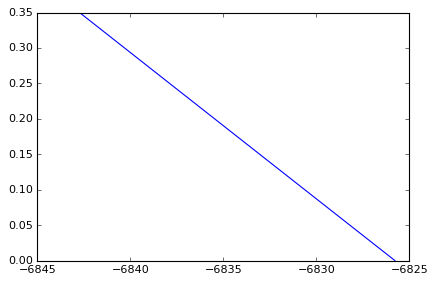

In [37]:
#plt.scatter(ρ, y)
plt.plot(rhos, np.linspace(0, 0.35, 50))

In [19]:
def ajuste_exp(x, a, b, c):
    return a + b*np.exp(c*x)

In [20]:
popt = np.array([1010.009, -0.009, 20.])

In [21]:
rhos = ajuste_exp(np.linspace(0, 0.35, 50), *popt)

(0.0, 0.4)

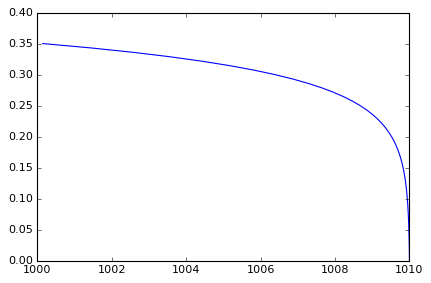

In [22]:
plt.plot(rhos, np.linspace(0, 0.35, 50))
plt.ylim(0.0, 0.4)

In [24]:
opt.curve_fit(ajuste_exp, ρ, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


(array([ 1.,  1.,  1.]), array([[ inf,  inf,  inf],
        [ inf,  inf,  inf],
        [ inf,  inf,  inf]]))

In [25]:
rhos = np.zeros(256)
y_s = np.linspace(0, 0.35, 50)

for i in range(0, 50):
    
    rhos[i] = ajuste_cubico(y_s[i], popt)

TypeError: ajuste_cubico() missing 3 required positional arguments: 'b', 'c', and 'd'

In [53]:
m = ((0.18-0.35)/12.5)

In [55]:
m * 0.18

-0.0024479999999999997

In [59]:
def perfil_arriba(x):
    return -12.5/(0.35 - 0.18)*x - -12.5/(0.35 - 0.18)*0.35

In [62]:
perfil_arriba(0.35)

0.0

In [70]:
0.18/(0.35/256)

131.65714285714287

In [76]:
ys = np.linspace(0.18, 0.35, 124)

In [81]:
s0 = ((132*12.5) + sum(perfil_arriba(ys)))/256

In [82]:
s0

9.47265625

In [2]:
ρ0 = 1000 - 0.78*(-5.8982)

In [10]:
ρ0

1004.600596

In [61]:
ρ(20, 0)

1009.201192

In [12]:
def ρ0(T):
    return 999.842594 + 6.793952e-2*T - 9.095290e-3*T**2 + 1.001685e-4*T**3 - 1.120083e-6*T**4 + 6.536336e-9*T**5

In [69]:
ρ0(5)

999.9667507885375

In [45]:
def sea_water_density(T, S):
    ρ_0 = 999.842594 + 6.793952e-2*T - 9.095290e-3*T**2 + 1.001685e-4*T**3 - 1.120083e-6*T**4 + 6.536336e-9*T**5
    A = 8.24493e-1 - 4.0899e-3*T+ 7.6438e-5*T**2-8.2467e-7*T**3+ 5.3875e-9*T**4
    B = -5.72466e-3 + 1.0227e-4*T-1.6546e-6*T**2
    C= 4.8314e-4
    return ρ_0 + A*S + B*S**(1.5) + C*S**2

In [130]:
def ρ(T, s):
    ρ0 = sea_water_density(20, 8.5)
    s0 = 5.8982
    T0 = 20
    b = 0.78
    a = 0.15
    return ρ0 - a*(T - T0) + b*(s - s0)
    

In [131]:
temp = np.linspace(20, 30, 30)

In [132]:
sea_water_density(20, 8.5)

1004.6576932327994

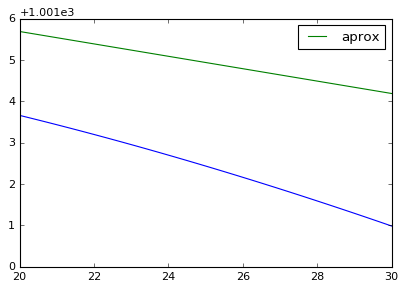

In [133]:
#plt.plot(temp, ρ0(temp))
plt.plot(temp, sea_water_density(temp, 8.5))
plt.plot(temp, ρ(temp, 8.5), label= 'aprox')
plt.legend()

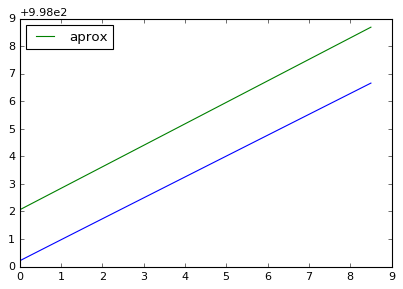

In [134]:
salys = np.linspace(0, 8.5, 30)

plt.plot(salys, sea_water_density(20, salys))
plt.plot(salys, ρ(20, salys), label= 'aprox')
plt.legend(loc = 'best')

In [64]:
sea_water_density(20, 10)

1005.7927041596943

In [23]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
temps = np.linspace(20, 30, 50)
sal = np.linspace(0, 12, 50)

In [42]:
Sm, Tm = np.meshgrid(sal, temps)

In [43]:
Sm.shape

(50, 50)

In [48]:
dd = sea_water_density(Tm, Sm)

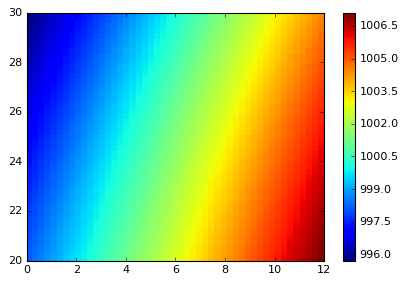

In [50]:
plt.pcolormesh(Sm, Tm, dd)
plt.colorbar()

<a list of 5 text.Text objects>

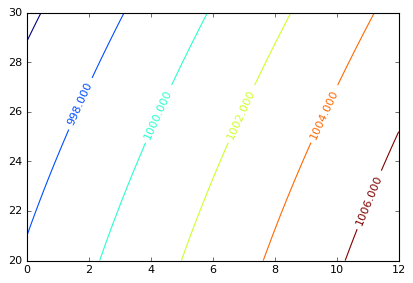

In [53]:
p1 = plt.contour(Sm, Tm, dd)
plt.clabel(p1)

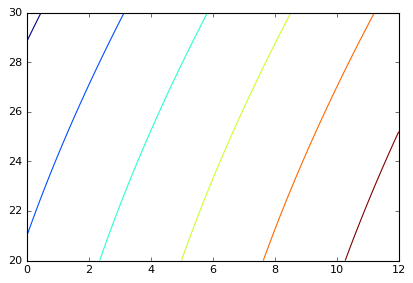

In [135]:
pt = plt.contour(Sm, Tm, dd)
pt.se